Importing the data

In [14]:
import pandas as pd

#reading the data
column_names = ['tag', 'text']
data = pd.read_fwf('TRAINING_DATA.txt', header=None, names=column_names)

data.head()

,tag,text
0,1,"Cuando conocí a Janice en 2013 , una familia n..."
1,0,Hwang habló en Sur de este año por Southwest M...
2,1,Usted podría pensar Katy Perry y Robert Pattin...
3,1,Cualquiera que haya volado los cielos del crea...
4,1,"Bueno , este cantante tendrá un LARGO tiempo p..."


In [15]:
import nltk
from nltk.tokenize import word_tokenize

#tokenize, lowercase, remove punctuation

def tokenizer(row):
  tokens = word_tokenize(row['text'])
  return [word.lower() for word in tokens if not word.isdigit()]

data['tokenized'] = data.apply(tokenizer,axis=1)
data.head()

,tag,text,tokenized
0,1,"Cuando conocí a Janice en 2013 , una familia n...","[cuando, conocí, a, janice, en, ,, una, famili..."
1,0,Hwang habló en Sur de este año por Southwest M...,"[hwang, habló, en, sur, de, este, año, por, so..."
2,1,Usted podría pensar Katy Perry y Robert Pattin...,"[usted, podría, pensar, katy, perry, y, robert..."
3,1,Cualquiera que haya volado los cielos del crea...,"[cualquiera, que, haya, volado, los, cielos, d..."
4,1,"Bueno , este cantante tendrá un LARGO tiempo p...","[bueno, ,, este, cantante, tendrá, un, largo, ..."


In [16]:
import string
# Function to calculate punctuation frequencies
def punctuation_frequency(text):
    punctuation_marks = string.punctuation
    punctuation_freq = {p: 0 for p in punctuation_marks}
    for char in text:
        if char in punctuation_marks:
            punctuation_freq[char] += 1
    return punctuation_freq
# Add punctuation frequency features to the DataFrame
data['punctuation_freq'] = data['text'].apply(punctuation_frequency)

data.head()

,tag,text,tokenized,punctuation_freq
0,1,"Cuando conocí a Janice en 2013 , una familia n...","[cuando, conocí, a, janice, en, ,, una, famili...","{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ..."
1,0,Hwang habló en Sur de este año por Southwest M...,"[hwang, habló, en, sur, de, este, año, por, so...","{'!': 0, '""': 2, '#': 0, '$': 0, '%': 0, '&': ..."
2,1,Usted podría pensar Katy Perry y Robert Pattin...,"[usted, podría, pensar, katy, perry, y, robert...","{'!': 1, '""': 0, '#': 0, '$': 0, '%': 0, '&': ..."
3,1,Cualquiera que haya volado los cielos del crea...,"[cualquiera, que, haya, volado, los, cielos, d...","{'!': 1, '""': 0, '#': 0, '$': 0, '%': 0, '&': ..."
4,1,"Bueno , este cantante tendrá un LARGO tiempo p...","[bueno, ,, este, cantante, tendrá, un, largo, ...","{'!': 1, '""': 0, '#': 0, '$': 0, '%': 0, '&': ..."


In [17]:
def re_blob(row):
  return " ".join(row['tokenized'])

data['clean_blob'] = data.apply(re_blob,axis=1)
data.head()

,tag,text,tokenized,punctuation_freq,clean_blob
0,1,"Cuando conocí a Janice en 2013 , una familia n...","[cuando, conocí, a, janice, en, ,, una, famili...","{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...","cuando conocí a janice en , una familia necesi..."
1,0,Hwang habló en Sur de este año por Southwest M...,"[hwang, habló, en, sur, de, este, año, por, so...","{'!': 0, '""': 2, '#': 0, '$': 0, '%': 0, '&': ...",hwang habló en sur de este año por southwest m...
2,1,Usted podría pensar Katy Perry y Robert Pattin...,"[usted, podría, pensar, katy, perry, y, robert...","{'!': 1, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...",usted podría pensar katy perry y robert pattin...
3,1,Cualquiera que haya volado los cielos del crea...,"[cualquiera, que, haya, volado, los, cielos, d...","{'!': 1, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...",cualquiera que haya volado los cielos del crea...
4,1,"Bueno , este cantante tendrá un LARGO tiempo p...","[bueno, ,, este, cantante, tendrá, un, largo, ...","{'!': 1, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...","bueno , este cantante tendrá un largo tiempo p..."


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17877 entries, 0 to 17876
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tag               17877 non-null  int64 
 1   text              17877 non-null  object
 2   tokenized         17877 non-null  object
 3   punctuation_freq  17877 non-null  object
 4   clean_blob        17877 non-null  object
dtypes: int64(1), object(4)
memory usage: 698.4+ KB


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack


# Convert 'punctuation_freq' to numeric, coercing errors to NaN and then filling them with 0
data['punctuation_freq'] = pd.to_numeric(data['punctuation_freq'], errors='coerce').fillna(0)

# Split the data into train and test sets
X = data[['clean_blob', 'punctuation_freq']]
y = data['tag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_text_vectorized = vectorizer.fit_transform(X_train['clean_blob'])
X_test_text_vectorized = vectorizer.transform(X_test['clean_blob'])

# Combine the TF-IDF features with punctuation frequency
X_train_combined = hstack([X_train_text_vectorized, X_train[['punctuation_freq']].values])
X_test_combined = hstack([X_test_text_vectorized, X_test[['punctuation_freq']].values])

# Train a Support Vector Machine (SVM) classifier
classifier = SVC(kernel='linear')
classifier.fit(X_train_combined, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_combined)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.39793064876957496
              precision    recall  f1-score   support

           0       0.39      0.41      0.40      1751
           1       0.41      0.39      0.40      1825

    accuracy                           0.40      3576
   macro avg       0.40      0.40      0.40      3576
weighted avg       0.40      0.40      0.40      3576



In [7]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=50, random_state=42)
classifier.fit(X_train_combined, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_combined)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.31655480984340045
              precision    recall  f1-score   support

           0       0.30      0.29      0.29      1751
           1       0.34      0.35      0.34      1825

    accuracy                           0.32      3576
   macro avg       0.32      0.32      0.32      3576
weighted avg       0.32      0.32      0.32      3576



In [8]:
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Load pre-trained Spanish BETO model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')
model = AutoModel.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')

def embed_text(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Get the embedding for the [CLS] token
    embedding = outputs.last_hidden_state[0][0].numpy()
    return embedding

# Apply embedding to the 'sentences' column
data['embedding'] = data['text'].apply(embed_text)

# Split the data
X = np.array(data['embedding'].tolist())
y = data['tag'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
gbc = GradientBoostingClassifier()

# Train the classifier
gbc.fit(X_train, y_train)

# Predict on the test set
y_pred = gbc.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test,y_pred)
print(report)

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.6526845637583892
              precision    recall  f1-score   support

           0       0.66      0.59      0.63      1751
           1       0.64      0.71      0.68      1825

    accuracy                           0.65      3576
   macro avg       0.65      0.65      0.65      3576
weighted avg       0.65      0.65      0.65      3576



In [9]:
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load pre-trained Spanish BETO model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')
model = AutoModel.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')

def embed_text(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Get the embedding for the [CLS] token
    embedding = outputs.last_hidden_state[0][0].numpy()
    return embedding

# Assume 'data' is already loaded and has 'text' and 'tag' columns
data['embedding'] = data['text'].apply(embed_text)

# Split the data
X = np.array(data['embedding'].tolist())
y = data['tag'].values

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier with hyperparameter tuning
gbc = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_gbc = grid_search.best_estimator_

# Predict on the test set
y_pred = best_gbc.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.6535234899328859
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      1751
           1       0.65      0.71      0.68      1825

    accuracy                           0.65      3576
   macro avg       0.65      0.65      0.65      3576
weighted avg       0.65      0.65      0.65      3576

Confusion Matrix:
[[1043  708]
 [ 531 1294]]


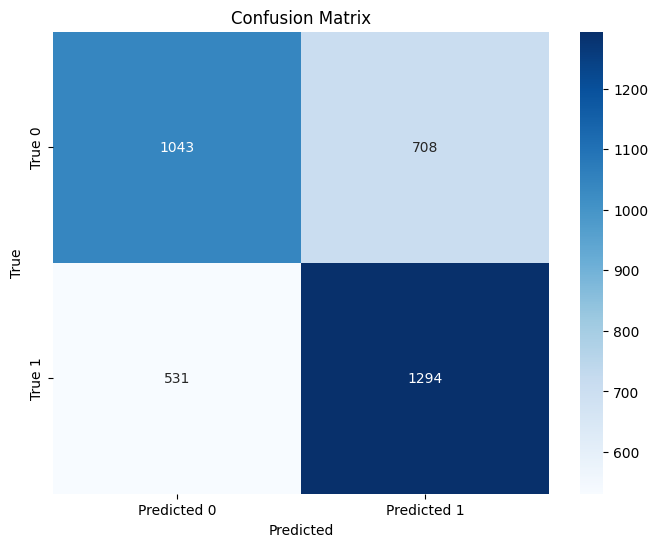

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Now fitting the model with all the trainning data

In [33]:
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Load pre-trained Spanish BETO model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')
model = AutoModel.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')

def embed_text(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Get the embedding for the [CLS] token
    embedding = outputs.last_hidden_state[0][0].numpy()
    return embedding

# Apply embedding to the 'sentences' column
data['embedding'] = data['text'].apply(embed_text)

# Split the data
X = np.array(data['embedding'].tolist())
y = data['tag'].values

#Now using the whole data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
gbc = GradientBoostingClassifier()

# Train the classifier
gbc.fit(X, y)

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GradientBoostingClassifier()

In [34]:
# Predict on the test set
y_pred_data = gbc.predict(X)

# Evaluate the classifier
accuracy_data = accuracy_score(y, y_pred_data)
print(f"Accuracy: {accuracy_data}")

report_data = classification_report(y,y_pred_data)
print(report_data)

Accuracy: 0.720143200760754
              precision    recall  f1-score   support

           0       0.75      0.67      0.70      8939
           1       0.70      0.77      0.73      8938

    accuracy                           0.72     17877
   macro avg       0.72      0.72      0.72     17877
weighted avg       0.72      0.72      0.72     17877



Confusion Matrix:
[[5959 2980]
 [2023 6915]]


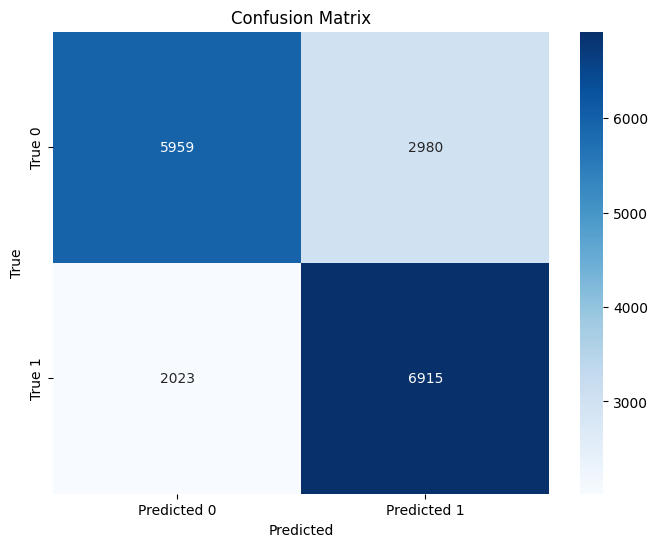

In [42]:
cm_data = confusion_matrix(y, y_pred_data)
print(f"Confusion Matrix:\n{cm_data}")



plt.figure(figsize=(8, 6))
sns.heatmap(cm_data, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Reading the Real Data

In [28]:
# Load the data from the provided file
file_path = 'REAL_DATA.txt'
real_data = []

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        tag, text = line.split('\t', 1)
        real_data.append((tag.strip(), text.strip()))

# Create a DataFrame
real_data = pd.DataFrame(real_data, columns=['tag', 'text'])

# Display the first few rows of the DataFrame
real_data.head()

,tag,text
0,2,Yo no creo que a nadie le haya encantado un pe...
1,2,No va a resolver sus problemas de crédito o me...
2,2,Te encantará este !
3,2,Yo estaba a volar a un aeropuerto varias horas...
4,2,"( Maid En Manhattan , The Wedding Planner , Je..."


In [29]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tag     2201 non-null   object
 1   text    2201 non-null   object
dtypes: object(2)
memory usage: 34.5+ KB


In [27]:
#real_data.drop(columns='tag')

,Text
0,Yo no creo que a nadie le haya encantado un pe...
1,No va a resolver sus problemas de crédito o me...
2,Te encantará este !
3,Yo estaba a volar a un aeropuerto varias horas...
4,"( Maid En Manhattan , The Wedding Planner , Je..."
...,...
2196,Robert Pattinson se está moviendo desde su ima...
2197,Era tan fresco !
2198,Al salir de la sala de ensayos de laboratorio ...
2199,""" Bueno , si usted pensaba que no era bueno pa..."


In [30]:
#tokenize, lowercase, remove punctuation

real_data['tokenized'] = real_data.apply(tokenizer,axis=1)
real_data.head()

,tag,text,tokenized
0,2,Yo no creo que a nadie le haya encantado un pe...,"[yo, no, creo, que, a, nadie, le, haya, encant..."
1,2,No va a resolver sus problemas de crédito o me...,"[no, va, a, resolver, sus, problemas, de, créd..."
2,2,Te encantará este !,"[te, encantará, este, !]"
3,2,Yo estaba a volar a un aeropuerto varias horas...,"[yo, estaba, a, volar, a, un, aeropuerto, vari..."
4,2,"( Maid En Manhattan , The Wedding Planner , Je...","[(, maid, en, manhattan, ,, the, wedding, plan..."


In [31]:
# Add punctuation frequency features to the DataFrame
real_data['punctuation_freq'] = real_data['text'].apply(punctuation_frequency)

real_data.head()

,tag,text,tokenized,punctuation_freq
0,2,Yo no creo que a nadie le haya encantado un pe...,"[yo, no, creo, que, a, nadie, le, haya, encant...","{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ..."
1,2,No va a resolver sus problemas de crédito o me...,"[no, va, a, resolver, sus, problemas, de, créd...","{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ..."
2,2,Te encantará este !,"[te, encantará, este, !]","{'!': 1, '""': 0, '#': 0, '$': 0, '%': 0, '&': ..."
3,2,Yo estaba a volar a un aeropuerto varias horas...,"[yo, estaba, a, volar, a, un, aeropuerto, vari...","{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ..."
4,2,"( Maid En Manhattan , The Wedding Planner , Je...","[(, maid, en, manhattan, ,, the, wedding, plan...","{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ..."


In [32]:
real_data['clean_blob'] = real_data.apply(re_blob,axis=1)
real_data.head()

,tag,text,tokenized,punctuation_freq,clean_blob
0,2,Yo no creo que a nadie le haya encantado un pe...,"[yo, no, creo, que, a, nadie, le, haya, encant...","{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...",yo no creo que a nadie le haya encantado un pe...
1,2,No va a resolver sus problemas de crédito o me...,"[no, va, a, resolver, sus, problemas, de, créd...","{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...",no va a resolver sus problemas de crédito o me...
2,2,Te encantará este !,"[te, encantará, este, !]","{'!': 1, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...",te encantará este !
3,2,Yo estaba a volar a un aeropuerto varias horas...,"[yo, estaba, a, volar, a, un, aeropuerto, vari...","{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...",yo estaba a volar a un aeropuerto varias horas...
4,2,"( Maid En Manhattan , The Wedding Planner , Je...","[(, maid, en, manhattan, ,, the, wedding, plan...","{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...","( maid en manhattan , the wedding planner , je..."


In [35]:
# Apply embedding to the 'sentences' column
real_data['embedding'] = real_data['text'].apply(embed_text)

# calling X_real
X_real = np.array(real_data['embedding'].tolist())

In [36]:
# Predict on the real data
y_pred_real = gbc.predict(X_real)

In [37]:
y_real_pred_df = pd.DataFrame(y_pred_real, columns=['Tag'])
y_real_pred_df.head()

,Tag
0,1
1,0
2,0
3,0
4,1


In [38]:
real_data['Tag'] = y_pred_real

In [40]:
real_data['tag'] = y_pred_real

In [41]:
real_data.head()

,tag,text,tokenized,punctuation_freq,clean_blob,embedding,Tag
0,1,Yo no creo que a nadie le haya encantado un pe...,"[yo, no, creo, que, a, nadie, le, haya, encant...","{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...",yo no creo que a nadie le haya encantado un pe...,"[0.7163744, -0.052741095, 0.02028694, 0.339569...",1
1,0,No va a resolver sus problemas de crédito o me...,"[no, va, a, resolver, sus, problemas, de, créd...","{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...",no va a resolver sus problemas de crédito o me...,"[-0.71393204, 0.13840812, 0.46272826, 0.050961...",0
2,0,Te encantará este !,"[te, encantará, este, !]","{'!': 1, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...",te encantará este !,"[0.37122512, -0.19370076, 1.2330142, -0.320147...",0
3,0,Yo estaba a volar a un aeropuerto varias horas...,"[yo, estaba, a, volar, a, un, aeropuerto, vari...","{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...",yo estaba a volar a un aeropuerto varias horas...,"[-0.066193335, -0.8057059, -0.33562523, -1.475...",0
4,1,"( Maid En Manhattan , The Wedding Planner , Je...","[(, maid, en, manhattan, ,, the, wedding, plan...","{'!': 0, '""': 0, '#': 0, '$': 0, '%': 0, '&': ...","( maid en manhattan , the wedding planner , je...","[0.40220204, -0.52340525, 0.7620691, -0.638286...",1


In [49]:
predicted_data = real_data.drop(columns=(['tokenized', 'punctuation_freq', 'clean_blob', 'embedding', 'Tag']))
predicted_data.head()

,tag,text
0,1,Yo no creo que a nadie le haya encantado un pe...
1,0,No va a resolver sus problemas de crédito o me...
2,0,Te encantará este !
3,0,Yo estaba a volar a un aeropuerto varias horas...
4,1,"( Maid En Manhattan , The Wedding Planner , Je..."


In [52]:
# Save DataFrame to a text file with tab as the delimiter
#predicted_data.to_csv('PREDICTIONS.txt', sep='\t', index=False)


In [54]:
file_path = 'REAL_DATA.txt'
predictions = []

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        tag, text = line.split('\t', 1)
        predictions.append((tag.strip(), text.strip()))

# Create a DataFrame
predictions = pd.DataFrame(predictions, columns=['tag', 'text'])

# Display the first few rows of the DataFrame
predictions.head(15)

,tag,text
0,2,Yo no creo que a nadie le haya encantado un pe...
1,2,No va a resolver sus problemas de crédito o me...
2,2,Te encantará este !
3,2,Yo estaba a volar a un aeropuerto varias horas...
4,2,"( Maid En Manhattan , The Wedding Planner , Je..."
5,2,Mi padre llegó con la primera ola de fuerzas a...
6,2,Y podemos todos estar de acuerdo que los envas...
7,2,"Por supuesto , todos los compañeros de reparto..."
8,2,Al estilo chino capitalismo autoritario - sí m...
9,2,Si sólo abrasador culpa y la envidia fuera de ...
